In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inline.Backend.figure_format = 'svg'

In [2]:
def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [210501,210508,210515,210522,210529,210605,210612,210619,210626,210703,210710,210717,210724,210731]
turnstiles_df_3 = get_data_parse_dt(week_nums)
turnstiles_df_3.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2021-04-24 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898
1,2021-04-24 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903
2,2021-04-24 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918
3,2021-04-24 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977
4,2021-04-24 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008


In [7]:
#remove whitespace from the column titles
turnstiles_df_3.columns = [column.strip() for column in turnstiles_df_3.columns]
turnstiles_df_3.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
#grouping by turnstiles locations and summing entries/exits by date
# note that SCP is the only location specific column that changes
turnstiles_df = turnstiles_df_3.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'SCP', 'DATE', 'DATE_TIME' ]).sum().reset_index()

In [10]:
turnstiles_df.head()

,C/A,UNIT,STATION,LINENAME,SCP,DATE,DATE_TIME,ENTRIES,EXITS
0,A002,R051,59 ST,NQR456W,02-00-00,04/24/2021,2021-04-24 00:00:00,7561288,2582898
1,A002,R051,59 ST,NQR456W,02-00-00,04/24/2021,2021-04-24 04:00:00,7561295,2582903
2,A002,R051,59 ST,NQR456W,02-00-00,04/24/2021,2021-04-24 08:00:00,7561302,2582918
3,A002,R051,59 ST,NQR456W,02-00-00,04/24/2021,2021-04-24 12:00:00,7561336,2582977
4,A002,R051,59 ST,NQR456W,02-00-00,04/24/2021,2021-04-24 16:00:00,7561426,2583008


In [12]:
#check for duplicated values
turnstiles_df_3.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'SCP', 'DATE_TIME' ])['ENTRIES'].count().reset_index().sort_values('ENTRIES', ascending = False).head(15)

,C/A,UNIT,STATION,LINENAME,SCP,DATE_TIME,ENTRIES
249639,B024,R211,KINGS HWY,BQ,00-05-00,2021-05-03 08:00:00,2
249640,B024,R211,KINGS HWY,BQ,00-05-00,2021-05-03 12:00:00,2
249642,B024,R211,KINGS HWY,BQ,00-05-00,2021-05-03 20:00:00,2
249643,B024,R211,KINGS HWY,BQ,00-05-00,2021-05-04 00:00:00,2
249646,B024,R211,KINGS HWY,BQ,00-05-00,2021-05-04 12:00:00,2
249647,B024,R211,KINGS HWY,BQ,00-05-00,2021-05-04 16:00:00,2
249648,B024,R211,KINGS HWY,BQ,00-05-00,2021-05-04 20:00:00,2
249649,B024,R211,KINGS HWY,BQ,00-05-00,2021-05-05 00:00:00,2
249650,B024,R211,KINGS HWY,BQ,00-05-00,2021-05-05 04:00:00,2
249651,B024,R211,KINGS HWY,BQ,00-05-00,2021-05-05 08:00:00,2


In [13]:
#drop the RECOVR AUD rows bcs of the weird data

df_full = turnstiles_df_3[turnstiles_df_3.DESC=='REGULAR']

In [14]:
#grouping by turnstiles locations and summing entries/exits by date
# keeping the LINENAME column in the groupby separates the stations that have the same name but
# are really in different locations

stations_df = turnstiles_df_3.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'DATE']).sum().reset_index()

In [15]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS
0,A002,R051,59 ST,NQR456W,04/24/2021,319446484,149207467
1,A002,R051,59 ST,NQR456W,04/25/2021,319462983,149218003
2,A002,R051,59 ST,NQR456W,04/26/2021,319477998,149232688
3,A002,R051,59 ST,NQR456W,04/27/2021,319506025,149254506
4,A002,R051,59 ST,NQR456W,04/28/2021,319535070,149277284


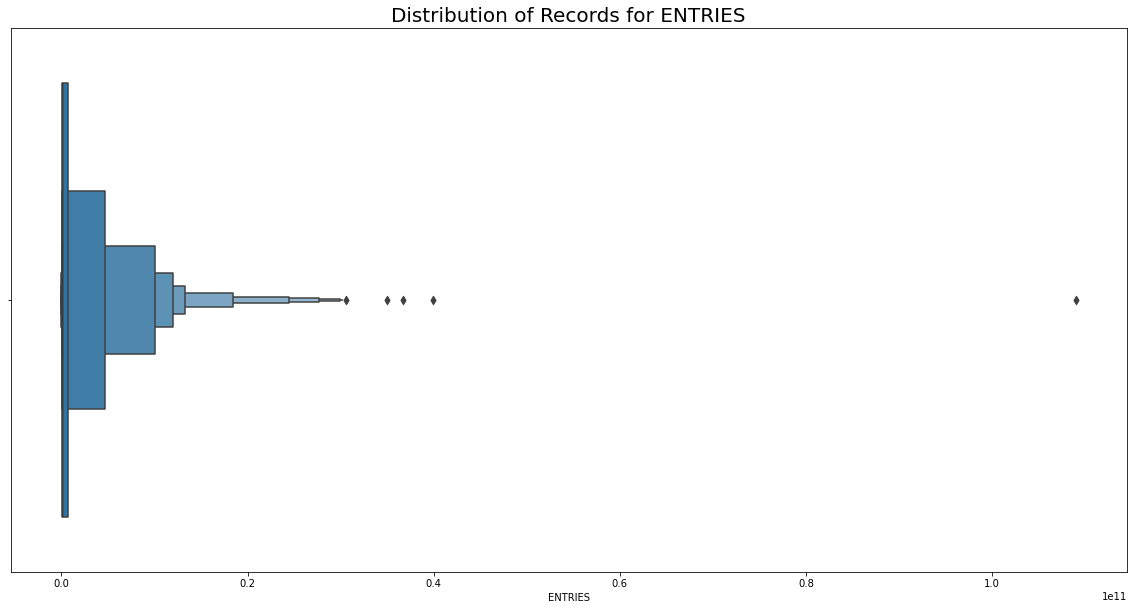

In [16]:
#check the distribution of records for entries

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
g = sns.boxenplot(x='ENTRIES', data=stations_df)
plt.title("Distribution of Records for ENTRIES", fontsize=20);

In [17]:
#drop everything greater than 2.75 x 10^(10)
stations_df = stations_df[stations_df.ENTRIES<=27500000000]

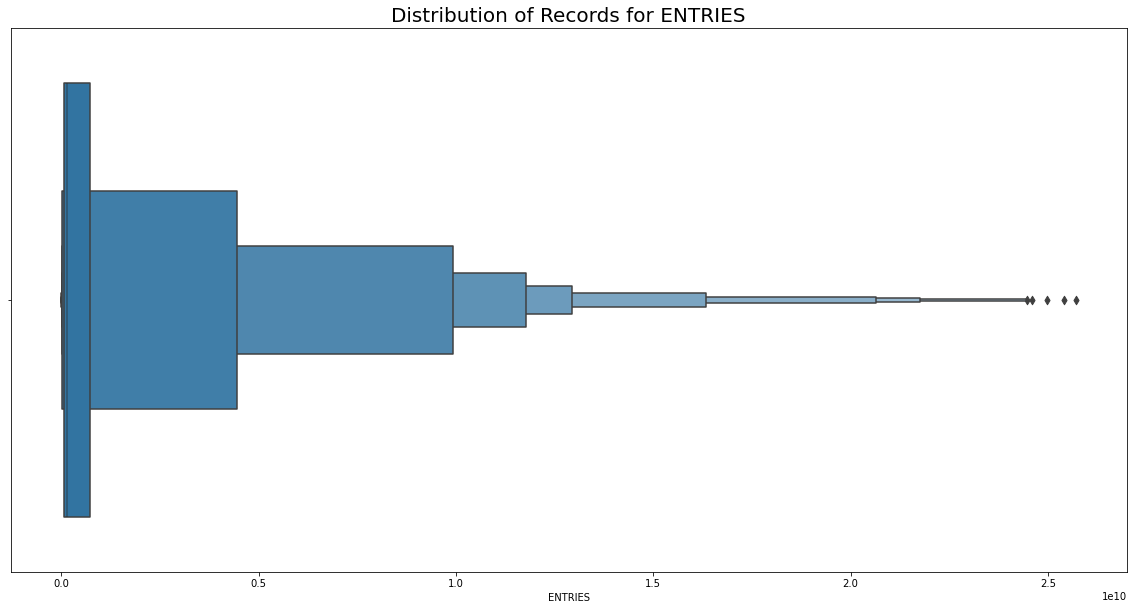

In [18]:
#check the distribution now

plt.figure(figsize=(20,10))
g = sns.boxenplot(x='ENTRIES', data=stations_df)
plt.title("Distribution of Records for ENTRIES", fontsize=20);

In [19]:

#create two new columns that are the previous day with associated 
#number of entries

stations_df[['Previous_date', 'Previous_Entries']] = (stations_df.groupby(["C/A", "UNIT", "STATION", "LINENAME"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

<ipython-input-19-7a3caab60f5f>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stations_df[['Previous_date', 'Previous_Entries']] = (stations_df.groupby(["C/A", "UNIT", "STATION", "LINENAME"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


In [20]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
0,A002,R051,59 ST,NQR456W,04/24/2021,319446484,149207467,NaN,NaN
1,A002,R051,59 ST,NQR456W,04/25/2021,319462983,149218003,04/24/2021,319446484.0
2,A002,R051,59 ST,NQR456W,04/26/2021,319477998,149232688,04/25/2021,319462983.0
3,A002,R051,59 ST,NQR456W,04/27/2021,319506025,149254506,04/26/2021,319477998.0
4,A002,R051,59 ST,NQR456W,04/28/2021,319535070,149277284,04/27/2021,319506025.0


In [21]:

#drop the first row associated with each new station in order to 
# not combine data for different turnstiles

stations_df.dropna(subset = ['Previous_date'], axis = 0, inplace = True)

In [22]:

stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
1,A002,R051,59 ST,NQR456W,04/25/2021,319462983,149218003,04/24/2021,319446484.0
2,A002,R051,59 ST,NQR456W,04/26/2021,319477998,149232688,04/25/2021,319462983.0
3,A002,R051,59 ST,NQR456W,04/27/2021,319506025,149254506,04/26/2021,319477998.0
4,A002,R051,59 ST,NQR456W,04/28/2021,319535070,149277284,04/27/2021,319506025.0
5,A002,R051,59 ST,NQR456W,04/29/2021,319563791,149300251,04/28/2021,319535070.0


In [23]:
#check, is the count actually increasing each day ?
# i.e., we should have count(yesterday) < count(today)
# but it looks like that's not the case

counter_mask = (stations_df['ENTRIES'] < stations_df['Previous_Entries'])
stations_df[counter_mask]

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
18,A002,R051,59 ST,NQR456W,05/12/2021,266580690,124630757,05/11/2021,319865228.0
29,A002,R051,59 ST,NQR456W,05/23/2021,276484851,134141134,05/22/2021,320171822.0
57,A002,R051,59 ST,NQR456W,06/20/2021,313287960,147709470,06/19/2021,320860665.0
66,A002,R051,59 ST,NQR456W,06/29/2021,314392088,148960297,06/28/2021,321085877.0
97,A002,R051,59 ST,NQR456W,07/30/2021,321950598,151153489,07/29/2021,375573297.0
...,...,...,...,...,...,...,...,...,...
73369,TRAM2,R469,RIT-ROOSEVELT,R,05/19/2021,50677622,2995470,05/18/2021,59101067.0
73377,TRAM2,R469,RIT-ROOSEVELT,R,05/27/2021,50766861,2997410,05/26/2021,94120751.0
73379,TRAM2,R469,RIT-ROOSEVELT,R,05/29/2021,50787192,2997841,05/28/2021,59241370.0
73421,TRAM2,R469,RIT-ROOSEVELT,R,07/10/2021,51315925,3011415,07/09/2021,59848742.0


In [24]:
#how many tursntiles have this issue?
stations_df[counter_mask].groupby(["C/A", "UNIT", "STATION", "LINENAME"]).size()

C/A    UNIT  STATION        LINENAME
A002   R051  59 ST          NQR456W     5
A006   R079  5 AV/59 ST     NQRW        8
A007   R079  5 AV/59 ST     NQRW        2
A010   R080  57 ST-7 AV     NQRW        4
A011   R080  57 ST-7 AV     NQRW        4
                                       ..
S101   R070  ST. GEORGE     1           3
S101A  R070  ST. GEORGE     1           3
S102   R165  TOMPKINSVILLE  1           2
TRAM1  R468  RIT-MANHATTAN  R           1
TRAM2  R469  RIT-ROOSEVELT  R           5
Length: 623, dtype: int64

In [27]:
# get the positive difference between days, and reset the counter manually if it is too 
# high

def daily_count2(row, max_count):
    count = row['ENTRIES'] - row['Previous_Entries']
    
    if count < 0:
        count *= -1
        
    if count > max_count:
        print(row["ENTRIES"], row["Previous_Entries"])
        count = min(row["ENTRIES"], row["Previous_Entries"])
        
    if count > max_count:
        return 0
    return count

stations_df['Daily_Entries'] = stations_df.apply(daily_count2, axis=1, max_count=10000)


319462983 319446484.0
319477998 319462983.0
319506025 319477998.0
319535070 319506025.0
319563791 319535070.0
319591695 319563791.0
319619495 319591695.0
319638767 319619495.0
319656104 319638767.0
319684179 319656104.0
319713864 319684179.0
319743687 319713864.0
319774537 319743687.0
319802952 319774537.0
319819951 319802952.0
319836092 319819951.0
319865228 319836092.0
266580690 319865228.0
319927436 266580690.0
319958194 319927436.0
319986132 319958194.0
320003963 319986132.0
320021016 320003963.0
320050813 320021016.0
320082213 320050813.0
320113462 320082213.0
320145007 320113462.0
320171822 320145007.0
276484851 320171822.0
320187371 276484851.0
320216616 320187371.0
320247351 320216616.0
320278280 320247351.0
320309226 320278280.0
320334503 320309226.0
320349149 320334503.0
320361799 320349149.0
320380888 320361799.0
320410324 320380888.0
320439448 320410324.0
320468025 320439448.0
320494538 320468025.0
320511991 320494538.0
320528799 320511991.0
320556125 320528799.0
320584615 

In [28]:
stations_df.nlargest(10, 'Daily_Entries')

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries
30353,N222,R156,BEDFORD PK BLVD,BD,07/12/2021,52302917,47019052,07/11/2021,5.229292e+07,10000.0
36478,N422,R318,FULTON ST,G,05/24/2021,99854256,109627643,05/23/2021,9.984426e+07,10000.0
49051,R142,R293,34 ST-PENN STA,123ACE,04/28/2021,8055917941,6920562950,04/27/2021,8.055908e+09,10000.0
50000,R160,R164,66 ST-LINCOLN,1,07/04/2021,277935907,141165097,07/03/2021,2.779259e+08,10000.0
54823,R226,R131,23 ST,6,07/27/2021,12028588129,9314335323,07/26/2021,1.202858e+10,10000.0
23477,N090,R139,CANAL ST,ACE,06/26/2021,118658758,156637371,06/25/2021,1.186488e+08,9999.0
37901,N512,R163,14 ST,FLM123,07/14/2021,43375127,54248250,07/13/2021,4.336513e+07,9999.0
46184,R111,R027,WALL ST,23,07/10/2021,194870448,244830718,07/09/2021,1.948604e+08,9999.0
22060,N069,R013,34 ST-PENN STA,ACE,05/12/2021,150075916,107190120,05/11/2021,1.500659e+08,9998.0
23745,N094,R029,WORLD TRADE CTR,ACE23,05/31/2021,9609806692,11066719075,05/30/2021,9.609797e+09,9998.0


In [29]:
#drop the zero daily entres
stations_df = stations_df[stations_df.Daily_Entries !=0]

In [30]:
#add the combination of station and line name
stations_df['STATION_LINE'] = stations_df['STATION'] + ' ' + stations_df['LINENAME']
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,STATION_LINE
127,A006,R079,5 AV/59 ST,NQRW,05/23/2021,131034357,182601450,05/22/2021,131034348.0,9.0,5 AV/59 ST NQRW
128,A006,R079,5 AV/59 ST,NQRW,05/24/2021,131041121,182613011,05/23/2021,131034357.0,6764.0,5 AV/59 ST NQRW
134,A006,R079,5 AV/59 ST,NQRW,05/30/2021,131157471,182721332,05/29/2021,131148264.0,9207.0,5 AV/59 ST NQRW
135,A006,R079,5 AV/59 ST,NQRW,05/31/2021,131165870,182729604,05/30/2021,131157471.0,8399.0,5 AV/59 ST NQRW
197,A007,R079,5 AV/59 ST,NQRW,04/25/2021,756217024,35919740,04/24/2021,756210613.0,6411.0,5 AV/59 ST NQRW


C:\Users\alrsa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily_Entries', ylabel='Density'>

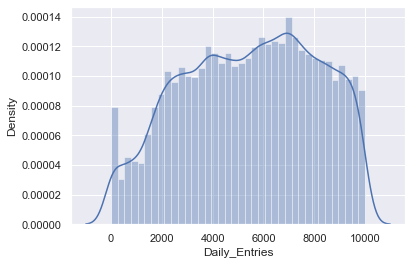

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
sns.distplot(stations_df['Daily_Entries']
             [stations_df['Daily_Entries'] < 50000])

In [32]:
stations_daily = (stations_df.groupby(['STATION', 'LINENAME', 'STATION_LINE', 'DATE'])['Daily_Entries'].sum().reset_index())

stations_daily.head(10)

,STATION,LINENAME,STATION_LINE,DATE,Daily_Entries
0,1 AV,L,1 AV L,04/25/2021,6840.0
1,1 AV,L,1 AV L,04/26/2021,14159.0
2,1 AV,L,1 AV L,04/27/2021,8830.0
3,1 AV,L,1 AV L,04/28/2021,8988.0
4,1 AV,L,1 AV L,04/29/2021,9616.0
5,1 AV,L,1 AV L,04/30/2021,9429.0
6,1 AV,L,1 AV L,05/01/2021,9357.0
7,1 AV,L,1 AV L,05/02/2021,6731.0
8,1 AV,L,1 AV L,05/03/2021,15396.0
9,1 AV,L,1 AV L,05/06/2021,9952.0


In [33]:
top10_stations = \
    (stations_daily.groupby(['STATION_LINE'])['Daily_Entries'].sum()
                   .reset_index()
                   .sort_values(by='Daily_Entries',ascending=False) 
                   .STATION_LINE.head(10))
top10_stations.head(10)

257    FULTON ST 2345ACJZ
21           14 ST FLM123
92             49 ST NQRW
175          BERGEN ST FG
90               46 ST MR
40              170 ST BD
406       WTC-CORTLANDT 1
275          HOUSTON ST 1
202     CATHEDRAL PKWY BC
256     FT HAMILTON PKY N
Name: STATION_LINE, dtype: object

In [34]:
stations_daily_top10 = stations_df[stations_df['STATION_LINE'].isin(top10_stations)]
stations_daily_top10

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,STATION_LINE
491,A013,R081,49 ST,NQRW,04/25/2021,153984929,309692111,04/24/2021,153979156.0,5773.0,49 ST NQRW
492,A013,R081,49 ST,NQRW,04/26/2021,153989468,309701363,04/25/2021,153984929.0,4539.0,49 ST NQRW
493,A013,R081,49 ST,NQRW,04/27/2021,153996370,309710868,04/26/2021,153989468.0,6902.0,49 ST NQRW
494,A013,R081,49 ST,NQRW,04/28/2021,154003594,309720599,04/27/2021,153996370.0,7224.0,49 ST NQRW
495,A013,R081,49 ST,NQRW,04/29/2021,154010721,309730496,04/28/2021,154003594.0,7127.0,49 ST NQRW
...,...,...,...,...,...,...,...,...,...,...,...
53940,R208,R014,FULTON ST,2345ACJZ,07/26/2021,38309053,46322738,07/25/2021,38306741.0,2312.0,FULTON ST 2345ACJZ
53941,R208,R014,FULTON ST,2345ACJZ,07/27/2021,38312863,46332855,07/26/2021,38309053.0,3810.0,FULTON ST 2345ACJZ
53942,R208,R014,FULTON ST,2345ACJZ,07/28/2021,38316715,46343290,07/27/2021,38312863.0,3852.0,FULTON ST 2345ACJZ
53943,R208,R014,FULTON ST,2345ACJZ,07/29/2021,38320642,46354210,07/28/2021,38316715.0,3927.0,FULTON ST 2345ACJZ


C:\Users\alrsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily_Entries', ylabel='STATION_LINE'>

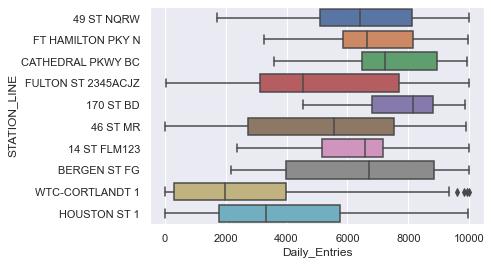

In [35]:
sns.boxplot('Daily_Entries', 'STATION_LINE',data=stations_daily_top10)

In [ ]:
#This figure shows the top 10 station for 'Daily_Entries', 'STATION_LINE'
